## ***Notebook: Exploratory Data Analysis (EDA)***

This notebook performs Exploratory Data Analysis (EDA) on a dataset to prepare it for machine learning model training. The steps include data loading, cleaning, feature engineering, and saving the processed dataset.

***Importing Libraries***

Import necessary libraries for data manipulation, visualization, and analysis.

In [1]:
import pandas as pd
from pandas import json_normalize
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

***Loading the dataset***

1. Load the dataset from a `.jsonlines` file into a Python list.
2. Normalize the JSON data into a flat table and display the column names.

In [2]:
with open('data/MLA_100k.jsonlines', 'r', encoding='utf-8') as f:
    data = [json.loads(line) for line in f]

In [3]:
df = json_normalize(data)
print(df.columns)

Index(['warranty', 'sub_status', 'condition', 'seller_contact', 'deal_ids',
       'base_price', 'non_mercado_pago_payment_methods', 'seller_id',
       'variations', 'site_id', 'listing_type_id', 'price', 'attributes',
       'buying_mode', 'tags', 'listing_source', 'parent_item_id',
       'coverage_areas', 'category_id', 'descriptions', 'last_updated',
       'international_delivery_mode', 'pictures', 'id', 'official_store_id',
       'differential_pricing', 'accepts_mercadopago', 'original_price',
       'currency_id', 'thumbnail', 'title', 'automatic_relist', 'date_created',
       'secure_thumbnail', 'stop_time', 'status', 'video_id',
       'catalog_product_id', 'subtitle', 'initial_quantity', 'start_time',
       'permalink', 'sold_quantity', 'available_quantity',
       'seller_address.comment', 'seller_address.longitude',
       'seller_address.id', 'seller_address.country.name',
       'seller_address.country.id', 'seller_address.address_line',
       'seller_address.latitud

### ***Initial Exploration***

In [4]:
df.head()

,warranty,sub_status,condition,seller_contact,deal_ids,base_price,non_mercado_pago_payment_methods,seller_id,variations,site_id,...,location.longitude,location.country.name,location.country.id,location.address_line,location.latitude,location.zip_code,location.city.name,location.city.id,location.state.name,location.state.id
0,None,[],new,NaN,[],80.0,"[{'description': 'Transferencia bancaria', 'id...",74952096,[],MLA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NUESTRA REPUTACION,[],used,NaN,[],2650.0,"[{'description': 'Transferencia bancaria', 'id...",42093335,[],MLA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,None,[],used,NaN,[],60.0,"[{'description': 'Transferencia bancaria', 'id...",133384258,[],MLA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,None,[],new,NaN,[],580.0,"[{'description': 'Transferencia bancaria', 'id...",143001605,[],MLA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MI REPUTACION.,[],used,NaN,[],30.0,"[{'description': 'Transferencia bancaria', 'id...",96873449,[],MLA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(100000, 92)

In [7]:
print("\nDataFrame general information:\n")
print(df.info())


DataFrame general information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 92 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   warranty                                          39104 non-null   object 
 1   sub_status                                        100000 non-null  object 
 2   condition                                         100000 non-null  object 
 3   seller_contact                                    0 non-null       float64
 4   deal_ids                                          100000 non-null  object 
 5   base_price                                        100000 non-null  float64
 6   non_mercado_pago_payment_methods                  100000 non-null  object 
 7   seller_id                                         100000 non-null  int64  
 8   variations                                        10

### ***Handling Missing Values***

Identify columns with missing values.

In [8]:
null_counts = df.isnull().sum()
null_columns = null_counts[null_counts > 0]
print(f"Number of columns with at least one null: {len(null_columns)}")

Number of columns with at least one null: 33


In [9]:
df_nulls = df[null_columns.index]

Calculate the percentage of missing values for each column and display a summary.

In [10]:
percent_nulls = (df_nulls.isnull().sum() / len(df)) * 100
nulls_summary = pd.DataFrame({
    "n_nulls": df_nulls.isnull().sum(),
    "%_nulls": percent_nulls.round(2)
})
print(nulls_summary.sort_values("n_nulls", ascending=False))


                            n_nulls  %_nulls
seller_contact               100000   100.00
subtitle                     100000   100.00
differential_pricing         100000   100.00
catalog_product_id            99989    99.99
shipping.dimensions           99977    99.98
original_price                99857    99.86
official_store_id             99182    99.18
location.country.id           97781    97.78
seller_contact.area_code2     97781    97.78
seller_contact.email          97781    97.78
seller_contact.contact        97781    97.78
seller_contact.webpage        97781    97.78
seller_contact.phone2         97781    97.78
location.open_hours           97781    97.78
seller_contact.phone          97781    97.78
seller_contact.other_info     97781    97.78
seller_contact.area_code      97781    97.78
location.city.name            97781    97.78
location.address_line         97781    97.78
location.latitude             97781    97.78
location.zip_code             97781    97.78
location.n

***Data Cleaning Decisions***

Columns with a high percentage of null values were removed from the dataset due to insufficient data coverage. Features with a low percentage of missing values (specifically `parent_item_id` and `shipping.methods`), were also dropped as they were deemed not relevant for predicting product conditions.

In [12]:
null_columns = df.columns[df.isnull().any()].tolist()

In [13]:
df = df.drop(columns=null_columns)

### ***Handling List-Type Columns***

In [14]:
df.head()

,sub_status,condition,deal_ids,base_price,non_mercado_pago_payment_methods,seller_id,variations,site_id,listing_type_id,price,...,seller_address.city.name,seller_address.city.id,seller_address.state.name,seller_address.state.id,shipping.local_pick_up,shipping.tags,shipping.free_shipping,shipping.mode,geolocation.latitude,geolocation.longitude
0,[],new,[],80.0,"[{'description': 'Transferencia bancaria', 'id...",74952096,[],MLA,bronze,80.0,...,San Cristóbal,TUxBQlNBTjkwNTZa,Capital Federal,AR-C,True,[],False,not_specified,-34.62807,-58.398671
1,[],used,[],2650.0,"[{'description': 'Transferencia bancaria', 'id...",42093335,[],MLA,silver,2650.0,...,Buenos Aires,,Capital Federal,AR-C,True,[],False,me2,-34.593552,-58.505917
2,[],used,[],60.0,"[{'description': 'Transferencia bancaria', 'id...",133384258,[],MLA,bronze,60.0,...,Boedo,TUxBQkJPRTQ0OTRa,Capital Federal,AR-C,True,[],False,me2,-34.623391,-58.414395
3,[],new,[],580.0,"[{'description': 'Transferencia bancaria', 'id...",143001605,[],MLA,silver,580.0,...,Floresta,TUxBQkZMTzg5MjFa,Capital Federal,AR-C,True,[],False,me2,-34.628189,-58.492921
4,[],used,[],30.0,"[{'description': 'Transferencia bancaria', 'id...",96873449,[],MLA,bronze,30.0,...,Tres de febrero,TUxBQ1RSRTMxODE5NA,Buenos Aires,AR-B,True,[],False,not_specified,-34.634655,-58.549504


Identify columns containing lists.

In [15]:
list_columns = df.columns[df.applymap(lambda x: isinstance(x, list)).any()].tolist()
print(f"Columns with lists: {list_columns}")

C:\Users\valen\AppData\Local\Temp\ipykernel_28296\3391193231.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  list_columns = df.columns[df.applymap(lambda x: isinstance(x, list)).any()].tolist()


Columns with lists: ['sub_status', 'deal_ids', 'non_mercado_pago_payment_methods', 'variations', 'attributes', 'tags', 'coverage_areas', 'descriptions', 'pictures', 'shipping.tags']


In [16]:
lists_df = df[list_columns]
lists_df.head()

,sub_status,deal_ids,non_mercado_pago_payment_methods,variations,attributes,tags,coverage_areas,descriptions,pictures,shipping.tags
0,[],[],"[{'description': 'Transferencia bancaria', 'id...",[],[],[dragged_bids_and_visits],[],[{'id': 'MLA578052519-912855983'}],"[{'size': '500x375', 'secure_url': 'https://a2...",[]
1,[],[],"[{'description': 'Transferencia bancaria', 'id...",[],[],[],[],[{'id': 'MLA581565358-930764806'}],"[{'size': '499x334', 'secure_url': 'https://a2...",[]
2,[],[],"[{'description': 'Transferencia bancaria', 'id...",[],[],[dragged_bids_and_visits],[],[{'id': 'MLA578780872-916478256'}],"[{'size': '375x500', 'secure_url': 'https://a2...",[]
3,[],[],"[{'description': 'Transferencia bancaria', 'id...",[],[],[],[],[{'id': 'MLA581877385-932309698'}],"[{'size': '441x423', 'secure_url': 'https://a2...",[]
4,[],[],"[{'description': 'Transferencia bancaria', 'id...",[],[],[dragged_bids_and_visits],[],[{'id': 'MLA576112692-902981678'}],"[{'size': '375x500', 'secure_url': 'https://a2...",[]


Verify number of records containing empty lists

In [ ]:

list_columns = [col for col in df.columns if df[col].apply(lambda x: isinstance(x, list)).any()]

summary = []

for col in list_columns:
    total = len(df)
    empty_records = df[col].apply(lambda x: isinstance(x, list) and len(x) == 0).sum()
    percentage = (empty_records / total) * 100
    summary.append({
        'column': col,
        'empty_values': empty_records,
        'percentage': round(percentage, 2)
    })

summary_df = pd.DataFrame(summary).sort_values(by='percentage', ascending=False)

print(summary_df)


                             column  empty_values  percentage
6                    coverage_areas        100000      100.00
9                     shipping.tags         99931       99.93
1                          deal_ids         99760       99.76
0                        sub_status         99014       99.01
3                        variations         91808       91.81
4                        attributes         87575       87.58
2  non_mercado_pago_payment_methods         30559       30.56
5                              tags         24910       24.91
7                      descriptions          2688        2.69
8                          pictures           789        0.79


Drop list-type columns that are not relevant for the analysis.

In [19]:
filtered_columns = [
    "coverage_areas",
    "shipping.tags",
    "deal_ids",
    "sub_status",
    "variations",
    "attributes",
    "descriptions",
    "pictures"
]
df = df.drop(columns=filtered_columns)

Verify values in `non_mercado_pago_payment_methods` and `tags` by defining a function to convert list-type columns into binary features.

In [20]:
def expand_list_column_to_binary(df, column, key=None, prefix=None):
    """
    Converts a column with lists (strings or dictionaries) into binary dummy variables.

    Parameters:
    - df: Original DataFrame.
    - column: Column to transform.
    - key: Key to extract if elements are dictionaries. None if elements are strings.
    - prefix: Prefix for new columns. Defaults to the column name.

    Returns:
    - Modified DataFrame with new binary columns.
    """
    
    prefix = prefix or column
    exploded = df[column].explode()

    if key:
        values = exploded.dropna().apply(lambda x: x.get(key) if isinstance(x, dict) else None)
    else:
        values = exploded.dropna()

    unique_values = values.dropna().unique()

    for val in unique_values:
        col_name = f"{prefix}_{val}"
        df[col_name] = df[column].apply(
            lambda lst: int(any((d.get(key) if key else d) == val for d in lst)) if isinstance(lst, list) else 0
        )

    return df

Apply the function to specific columns and drop the original list-type columns.

In [21]:
df = expand_list_column_to_binary(df, 'non_mercado_pago_payment_methods', key='id', prefix='payment')

df = expand_list_column_to_binary(df, 'tags', key=None, prefix='tag')

df.drop(columns=['non_mercado_pago_payment_methods', 'tags'], inplace=True)

temp_df = df.filter(regex='^(payment|tag)_')

In [22]:
payment_tag_columns = temp_df.columns.tolist()
print(payment_tag_columns)

['payment_MLATB', 'payment_MLAWC', 'payment_MLAMO', 'payment_MLAOT', 'payment_MLAMC', 'payment_MLAMS', 'payment_MLAVE', 'payment_MLACD', 'payment_MLAVS', 'payment_MLADC', 'payment_MLAAM', 'payment_MLAWT', 'payment_MLAMP', 'payment_MLABC', 'tag_dragged_bids_and_visits', 'tag_good_quality_thumbnail', 'tag_dragged_visits', 'tag_free_relist', 'tag_poor_quality_thumbnail']


After careful evaluation, none of these variables demonstrated significant predictive value for determining product condition. Consequently, they were removed from the dataset to improve model efficiency and focus on more relevant features

In [22]:
columnas = ['payment_MLATB', 'payment_MLAWC', 'payment_MLAMO', 'payment_MLAOT', 'payment_MLAMC', 'payment_MLAMS', 'payment_MLAVE', 'payment_MLACD', 'payment_MLAVS', 'payment_MLADC', 'payment_MLAAM', 'payment_MLAWT', 'payment_MLAMP', 'payment_MLABC', 'tag_dragged_bids_and_visits', 'tag_good_quality_thumbnail', 'tag_dragged_visits', 'tag_free_relist', 'tag_poor_quality_thumbnail']
df.drop(columns=columnas, inplace=True)

### ***Verifying duplicated records***

In [26]:
print(df.duplicated().sum())

0


### ***Distribution of the objective variable***

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 49 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   condition                                         100000 non-null  object 
 1   base_price                                        100000 non-null  float64
 2   seller_id                                         100000 non-null  int64  
 3   site_id                                           100000 non-null  object 
 4   listing_type_id                                   100000 non-null  object 
 5   price                                             100000 non-null  float64
 6   buying_mode                                       100000 non-null  object 
 7   listing_source                                    100000 non-null  object 
 8   category_id                                       100000 non-null  object 
 9   last_

In [27]:
df.head()

,condition,base_price,seller_id,site_id,listing_type_id,price,buying_mode,listing_source,category_id,last_updated,...,seller_address.zip_code,seller_address.city.name,seller_address.city.id,seller_address.state.name,seller_address.state.id,shipping.local_pick_up,shipping.free_shipping,shipping.mode,geolocation.latitude,geolocation.longitude
0,new,80.0,74952096,MLA,bronze,80.0,buy_it_now,,MLA126406,2015-09-05T20:42:58.000Z,...,,San Cristóbal,TUxBQlNBTjkwNTZa,Capital Federal,AR-C,True,False,not_specified,-34.62807,-58.398671
1,used,2650.0,42093335,MLA,silver,2650.0,buy_it_now,,MLA10267,2015-09-26T18:08:34.000Z,...,,Buenos Aires,,Capital Federal,AR-C,True,False,me2,-34.593552,-58.505917
2,used,60.0,133384258,MLA,bronze,60.0,buy_it_now,,MLA1227,2015-09-09T23:57:10.000Z,...,,Boedo,TUxBQkJPRTQ0OTRa,Capital Federal,AR-C,True,False,me2,-34.623391,-58.414395
3,new,580.0,143001605,MLA,silver,580.0,buy_it_now,,MLA86345,2015-10-05T16:03:50.306Z,...,,Floresta,TUxBQkZMTzg5MjFa,Capital Federal,AR-C,True,False,me2,-34.628189,-58.492921
4,used,30.0,96873449,MLA,bronze,30.0,buy_it_now,,MLA41287,2015-08-28T13:37:41.000Z,...,,Tres de febrero,TUxBQ1RSRTMxODE5NA,Buenos Aires,AR-B,True,False,not_specified,-34.634655,-58.549504


In [23]:
print("\nDistribution of the target variable (condition):")
print(df['condition'].value_counts())


Distribution of the target variable (condition):
condition
new     53758
used    46242
Name: count, dtype: int64


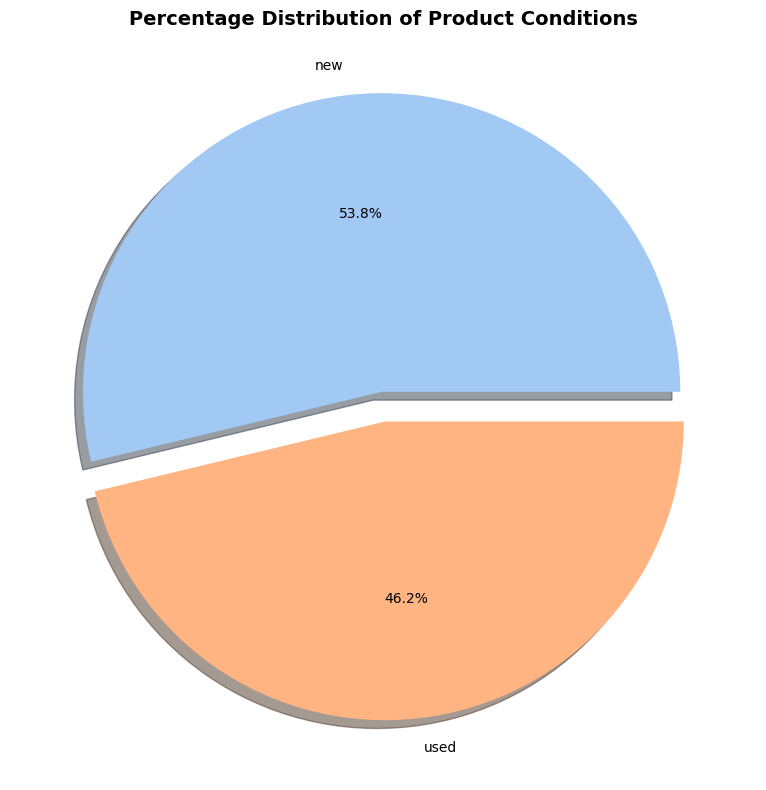

In [28]:
plt.figure(figsize=(8, 8))
df['condition'].value_counts().plot.pie(autopct='%1.1f%%',
                                       colors=sns.color_palette('pastel'),
                                       explode=[0.05]*len(df['condition'].unique()),
                                       shadow=True)
plt.title("Percentage Distribution of Product Conditions", 
          fontsize=14, fontweight='bold')
plt.ylabel('')
plt.tight_layout()

The pie chart reveals a moderately balanced distribution between "new" (53.8%) and "used" (46.2%) product conditions, indicating no severe class imbalance that would require extensive mitigation

### ***Selecting features***

The differences between `base_price` and `price` are checked to decide whether to keep both columns or choose one.

In [29]:
print(f"Number of rows where the values are different: {(df['base_price'] != df['price']).sum()}")

Number of rows where the values are different: 29


Select the features considered necessary to predict product condition

In [30]:
selected_features = ['listing_type_id', 'price',  'buying_mode', 'automatic_relist', 'initial_quantity', 'sold_quantity', 'available_quantity', 
                     'shipping.local_pick_up', 'shipping.free_shipping']

df_model = df[selected_features + ['condition']]

In [32]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   listing_type_id         100000 non-null  object 
 1   price                   100000 non-null  float64
 2   buying_mode             100000 non-null  object 
 3   automatic_relist        100000 non-null  bool   
 4   initial_quantity        100000 non-null  int64  
 5   sold_quantity           100000 non-null  int64  
 6   available_quantity      100000 non-null  int64  
 7   shipping.local_pick_up  100000 non-null  bool   
 8   shipping.free_shipping  100000 non-null  bool   
 9   condition               100000 non-null  object 
dtypes: bool(3), float64(1), int64(3), object(3)
memory usage: 5.6+ MB


***Encoding and Data Transformation***

Encode categorical and boolean columns into numerical values.

In [35]:
df_model['condition'] = df_model['condition'].map({'new': 1, 'used': 0})

C:\Users\valen\AppData\Local\Temp\ipykernel_10172\1657064261.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['condition'] = df_model['condition'].map({'new': 1, 'used': 0})


In [36]:
df_model['automatic_relist'] = df_model['automatic_relist'].astype(int)
df_model['shipping.local_pick_up'] = df_model['shipping.local_pick_up'].astype(int)
df_model['shipping.free_shipping'] = df_model['shipping.free_shipping'].astype(int)

C:\Users\valen\AppData\Local\Temp\ipykernel_10172\429622731.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['automatic_relist'] = df_model['automatic_relist'].astype(int)
C:\Users\valen\AppData\Local\Temp\ipykernel_10172\429622731.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['shipping.local_pick_up'] = df_model['shipping.local_pick_up'].astype(int)
C:\Users\valen\AppData\Local\Temp\ipykernel_10172\429622731.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

***Saving the Processed Dataset***

Save the processed dataset to a CSV file for use in model training.

In [32]:
print("\nFinal DataFrame for the model:")
df_model.head()


Final DataFrame for the model:


,listing_type_id,price,buying_mode,automatic_relist,initial_quantity,sold_quantity,available_quantity,shipping.local_pick_up,shipping.free_shipping,condition
0,bronze,80.0,buy_it_now,False,1,0,1,True,False,new
1,silver,2650.0,buy_it_now,False,1,0,1,True,False,used
2,bronze,60.0,buy_it_now,False,1,0,1,True,False,used
3,silver,580.0,buy_it_now,False,1,0,1,True,False,new
4,bronze,30.0,buy_it_now,False,1,0,1,True,False,used


In [33]:
df_model.to_csv('data/processed_data.csv', index=False)
print("\nProcessed data stored in ‘processed_data.csv’.")


Processed data stored in ‘processed_data.csv’.


### ***Summary***

This notebook performs the following key tasks:

1. Loads and explores the dataset.
2. Handles missing values and irrelevant columns.
3. Converts list-type columns into binary features.
4. Selects relevant features for modeling.
5. Encodes categorical and boolean variables.
6. Saves the cleaned and processed dataset for further use.

This ensures the dataset is ready for machine learning model training in subsequent steps.